In [156]:
# open lrg indices
from astropy.table import Table
t1 = Table.read('../lrg_sample_indices.dat', format='ascii')

In [157]:
# open vagc photometirc catalog
t2 = Table.read('../lrg_photo_cat.hdf5', path='data')

In [158]:
# open vagc spectroscopic catalog
t3 = Table.read('../object_sdss_imaging.fits')

In [159]:
# open additional photometric properties
t4 = Table.read('../object_sdss_spectro.fits')
print(t2.colnames)

['RA', 'DEC', 'RUN', 'CAMCOL', 'FIELD', 'ID', 'PIXSCALE', 'PSF_FWHM', 'PHI_OFFSET', 'PETRORAD', 'PETRORADERR', 'PETROR50', 'PETROR50ERR', 'PETROR90', 'PETROR90ERR', 'M_E1', 'M_E2', 'M_E1E1ERR', 'M_E1E2ERR', 'M_E2E2ERR', 'M_RR_CC', 'M_RR_CCERR', 'M_CR4', 'M_E1_PSF', 'M_E2_PSF', 'M_RR_CC_PSF', 'M_CR4_PSF', 'ISO_ROWC', 'ISO_ROWCERR', 'ISO_ROWCGRAD', 'ISO_COLC', 'ISO_COLCERR', 'ISO_COLCGRAD', 'ISO_A', 'ISO_AERR', 'ISO_AGRAD', 'ISO_B', 'ISO_BERR', 'ISO_BGRAD', 'ISO_PHIGRAD', 'R_DEV', 'R_DEVERR', 'AB_DEV', 'AB_DEVERR', 'R_EXP', 'R_EXPERR', 'AB_EXP', 'AB_EXPERR', 'PHI_ISO_DEG', 'PHI_DEV_DEG', 'PHI_EXP_DEG']


In [160]:
# define ellipticity
e_0 = np.sqrt(t2['M_E1'][:,1]**2 + t2['M_E2'][:,1]**2)
q = np.sqrt(1-e_0)/np.sqrt(1+e_0)
e_1 = 1-q
e_2 = 1.0 - (t2['ISO_B'][:,1]/t2['ISO_A'][:,1])
e_3 = 1.0 - (t2['AB_DEV'][:,1])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


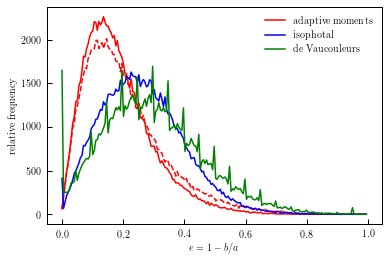

In [161]:
# examine ellipticity distributions
bins = np.linspace(0,1,200)
counts_0 = np.histogram(e_0, bins=bins)[0]
counts_1 = np.histogram(e_1, bins=bins)[0]
counts_2 = np.histogram(e_2, bins=bins)[0]
counts_3 = np.histogram(e_3, bins=bins)[0]

plt.figure()
l0, = plt.plot(bins[:-1], counts_0, '--', color='red')
l1, = plt.plot(bins[:-1], counts_1, '-', color='red')
l2, = plt.plot(bins[:-1], counts_2, '-', color='blue')
l3, = plt.plot(bins[:-1], counts_3, '-', color='green')
plt.legend([l1,l2,l3],['adaptive moments', 'isophotal', 'de Vaucouleurs'],
          loc='upper right', frameon=False, fontsize=10)
plt.xlabel(r'$e=1-b/a$')
plt.ylabel('relative frequency')
plt.show()